# (彩蛋)金融量化分析

In [95]:
import requests
import pandas as pd

In [96]:
url = "https://www.coingecko.com/price_charts/1/usd/max.json"
url_headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.119 Safari/537.36"}
data = requests.get(url, headers = url_headers)
data

<Response [200]>

In [97]:
# 取價格及成交量, 資料為Json格式
prices = data.json()['stats']
volumes = data.json()['total_volumes']

In [98]:
# 將資料轉為DataFram, 利用pandas.DataFrame(Data)
DF_Price = pd.DataFrame(data=prices, columns=['date','close'])
DF_Volume = pd.DataFrame(data=volumes, columns=['date','volume'])

## 金融資料集
### 一般為時間序列, 資料集格式為“交易日,開盤價,當日最高,當日最低,收盤價,成交量“
### 由於資料僅有日期, 價格及成交量, 缺開盤價, 當日最高、低
### 解題方向：
### 開盤價->前一天的收盤, 做為今日的開盤
### 由於第一筆無前一天收盤,故當平盤(開、收盤相同); 或可由第2筆開始算起
### 當日最高、低->max(開盤價, 收盤價); min(開盤價, 收盤價)

In [99]:
# 第一筆為平盤,第二筆開始為前一大的收盤價, 最後 天的收盤捨棄
Open = [DF_Price['close'][0]]
Open.extend(DF_Price['close'][0:-1])

In [100]:
# 算每日最高、低
Close = list(DF_Price['close'])
High = [max(o, c) for o, c in zip(Open, Close)]
Low = [min(o, c) for o, c in zip(Open, Close)]

In [101]:
# 合併為金融資料集
DF_Financil = DF_Price
DF_Financil['open'] = Open
DF_Financil['high'] = High
DF_Financil['low'] = Low
DF_Financil['volume'] = DF_Volume['volume']
DF_Financil.head(10)

,date,close,open,high,low,volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,141.96,135.30,141.96,135.30,0.0
2,1367280000000,135.30,141.96,141.96,135.30,0.0
3,1367366400000,117.00,135.30,135.30,117.00,0.0
4,1367452800000,103.43,117.00,117.00,103.43,0.0
5,1367539200000,91.01,103.43,103.43,91.01,0.0
6,1367625600000,111.25,91.01,111.25,91.01,0.0
7,1367712000000,116.79,111.25,116.79,111.25,0.0
8,1367798400000,118.33,116.79,118.33,116.79,0.0
9,1367884800000,106.40,118.33,118.33,106.40,0.0


In [102]:
# 重排一下Column的順序
cols = DF_Financil.columns.tolist()
print('現有順序：', cols)
cols = ['date', 'open', 'high', 'low', 'close', 'volume']
print('重排順序：', cols)

現有順序： ['date', 'close', 'open', 'high', 'low', 'volume']
重排順序： ['date', 'open', 'high', 'low', 'close', 'volume']


In [103]:
# 重排DataFrame的column順序
DF_Financil = DF_Financil[cols]
DF_Financil.head(10)

,date,open,high,low,close,volume
0,1367107200000,135.30,135.30,135.30,135.30,0.0
1,1367193600000,135.30,141.96,135.30,141.96,0.0
2,1367280000000,141.96,141.96,135.30,135.30,0.0
3,1367366400000,135.30,135.30,117.00,117.00,0.0
4,1367452800000,117.00,117.00,103.43,103.43,0.0
5,1367539200000,103.43,103.43,91.01,91.01,0.0
6,1367625600000,91.01,111.25,91.01,111.25,0.0
7,1367712000000,111.25,116.79,111.25,116.79,0.0
8,1367798400000,116.79,118.33,116.79,118.33,0.0
9,1367884800000,118.33,118.33,106.40,106.40,0.0


In [104]:
# 將Date由秒數轉為日期格式
DF_Financil['date'] = pd.to_datetime(DF_Financil['date'], unit='ms')
DF_Financil.head(10)

,date,open,high,low,close,volume
0,2013-04-28,135.30,135.30,135.30,135.30,0.0
1,2013-04-29,135.30,141.96,135.30,141.96,0.0
2,2013-04-30,141.96,141.96,135.30,135.30,0.0
3,2013-05-01,135.30,135.30,117.00,117.00,0.0
4,2013-05-02,117.00,117.00,103.43,103.43,0.0
5,2013-05-03,103.43,103.43,91.01,91.01,0.0
6,2013-05-04,91.01,111.25,91.01,111.25,0.0
7,2013-05-05,111.25,116.79,111.25,116.79,0.0
8,2013-05-06,116.79,118.33,116.79,118.33,0.0
9,2013-05-07,118.33,118.33,106.40,106.40,0.0


In [105]:
# 將資料集轉為時間序列(time series)
DF_Financil.index = DF_Financil['date']
DF_Financil.head(10)

,date,open,high,low,close,volume
date,,,,,,
2013-04-28,2013-04-28,135.30,135.30,135.30,135.30,0.0
2013-04-29,2013-04-29,135.30,141.96,135.30,141.96,0.0
2013-04-30,2013-04-30,141.96,141.96,135.30,135.30,0.0
2013-05-01,2013-05-01,135.30,135.30,117.00,117.00,0.0
2013-05-02,2013-05-02,117.00,117.00,103.43,103.43,0.0
2013-05-03,2013-05-03,103.43,103.43,91.01,91.01,0.0
2013-05-04,2013-05-04,91.01,111.25,91.01,111.25,0.0
2013-05-05,2013-05-05,111.25,116.79,111.25,116.79,0.0
2013-05-06,2013-05-06,116.79,118.33,116.79,118.33,0.0


## 可利用一些金融套件, 做後續分析
### 採用Ta-lib套件
### [Python 簡單158種技術指標計算](https://www.finlab.tw/Python-%E7%B0%A1%E5%96%AE158%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99%E8%A8%88%E7%AE%97/)

In [106]:
## 前人的智慧
from talib import abstract 
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

def plot_candles(start_time, end_time, pricing, title=None,
                 volume_bars=False,
                 color_function=None,
                 overlays=None,
                 technicals=None,
                 technicals_titles=None):
    """ Plots a candlestick chart using quantopian pricing data.
    
    Author: Daniel Treiman
    
    Args:
      pricing: A pandas dataframe with columns ['open_price', 'close_price', 'high', 'low', 'volume']
      title: An optional title for the chart
      volume_bars: If True, plots volume bars
      color_function: A function which, given a row index and price series, returns a candle color.
      overlays: A list of additional data series to overlay on top of pricing.  Must be the same length as pricing.
      technicals: A list of additional data series to display as subplots.
      technicals_titles: A list of titles to display for each technical indicator.
    """
    
    pricing = pricing[start_time:end_time]
    if overlays is not None:
        overlays = [o[start_time:end_time] for o in overlays]
    if technicals is not None:
        technicals = [t[start_time:end_time] for t in technicals]
    
    def default_color(index, open_price, close_price, low, high):
        return 'g' if open_price[index] > close_price[index] else 'r'
    color_function = color_function or default_color
    overlays = overlays or []
    technicals = technicals or []
    technicals_titles = technicals_titles or []
    open_price = pricing['open']
    close_price = pricing['close']
    low = pricing['low']
    high = pricing['high']
    oc_min = pd.concat([open_price, close_price], axis=1).min(axis=1)
    oc_max = pd.concat([open_price, close_price], axis=1).max(axis=1)
    
    subplot_count = 1
    if volume_bars:
        subplot_count = 2
    if technicals:
        subplot_count += len(technicals)
    
    if subplot_count == 1:
        fig, ax1 = plt.subplots(1, 1)
    else:
        ratios = np.insert(np.full(subplot_count - 1, 1), 0, 3)
        fig, subplots = plt.subplots(subplot_count, 1, sharex=True, gridspec_kw={'height_ratios': ratios})
        ax1 = subplots[0]
        
    if title:
        ax1.set_title(title)
    x = np.arange(len(pricing))
    candle_colors = [color_function(i, open_price, close_price, low, high) for i in x]
    candles = ax1.bar(x, oc_max-oc_min, bottom=oc_min, color=candle_colors, linewidth=0)
    lines = ax1.vlines(x , low, high, color=candle_colors, linewidth=1)#+ 0.4
    ax1.xaxis.grid(False)
    ax1.xaxis.set_tick_params(which='major', length=3.0, direction='in', top='off')
    # Assume minute frequency if first two bars are in the same day.
    frequency = 'minute' if (pricing.index[1] - pricing.index[0]).days == 0 else 'day'
    time_format = '%d-%m-%Y'
    if frequency == 'minute':
        time_format = '%H:%M'
    # Set X axis tick labels.
    ticks = [date.strftime(time_format) for date in pricing.index]
    space = max(int(len(ticks) / 20), 1)
    
    for i, t in enumerate(ticks):
        ticks[i] = t if i%space == 0 or i == len(ticks) - 1 else ''
        
    plt.xticks(x, ticks, rotation='vertical')
    for overlay in overlays:
        ax1.plot(x, overlay)
    # Plot volume bars if needed
    if volume_bars:
        ax2 = subplots[1]
        volume = pricing['volume']
        volume_scale = None
        scaled_volume = volume
        if volume.max() > 1000000:
            volume_scale = 'M'
            scaled_volume = volume / 1000000
        elif volume.max() > 1000:
            volume_scale = 'K'
            scaled_volume = volume / 1000
        ax2.bar(x, scaled_volume, color=candle_colors)
        volume_title = 'Volume'
        if volume_scale:
            volume_title = 'Volume (%s)' % volume_scale
        ax2.set_title(volume_title)
        ax2.xaxis.grid(False)
    # Plot additional technical indicators
    for (i, technical) in enumerate(technicals):
        ax = subplots[i - len(technicals)] # Technical indicator plots are shown last
        ax.plot(x, technical)
        if i < len(technicals_titles):
            ax.set_title(technicals_titles[i])


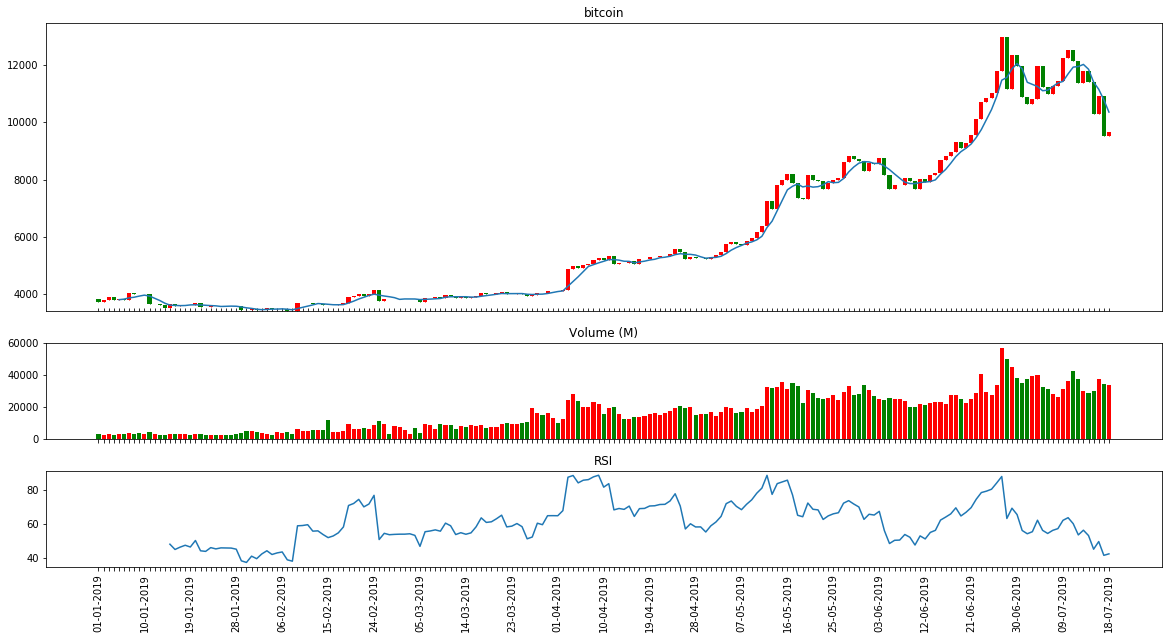

In [107]:
# 取少一點資料來畫圖
df = DF_Financil[DF_Financil['date'] >= '2019-01-01']
# 將各項指標計算出來
SMA = abstract.SMA(df)
RSI = abstract.RSI(df)
STOCH = abstract.STOCH(df)     ## STOCH是 KD 線
# 畫圖
plot_candles(
             start_time='2019-01-01',      ## 開始時間
             end_time='2019-07-18',       ## 結束時間
             pricing=df,                            ## dataframe 只吃 ['open_price', 'close_price', 'high', 'low', 'volume']
             title='bitcoin',                      ## 名稱而已
             volume_bars=True,               ## 畫不畫 量圖
             overlays=[SMA],                    ##  跟股價圖 疊起來的是什麼指標
             technicals = [RSI],    ## 其他圖要畫甚麼
             technicals_titles=['RSI', 'KD'] ## 其他圖的名稱
            )